In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generative Modeling

As we're planning an experiment it helps to understand the kind of data we're expecting to collect and the method we're planning to use to make sense of the data.

We can use python to generate data that has statistical properties simialar to the data we are expecting to measure. We can then use that to apply whatever statistical methods we're planning to use on the real data to ensure they work as expected on the generated data.


One way to use computation in the lab is to identify a model that is expected to describe the data collected, then apply a statistical process to find the parameters of the model using the data collected. We can *validate* this process by generating data that has statistical properties similar to the data we expect to see and check that the process correcly determines the parameters.

## An example: Ohm's Law

Suppose we set up the circuit shown in Fig. 1 below. We can set the source voltage, and we have a known resistance of $1\  {\rm k}\Omega$ in series with an unknown resistance. The idea is to set the source voltage to a series of values and at each value, measure the voltage at the junction between the known and unknown resistance. We can then compute the current through the known resistor, and assuming the voltage measurement draws very little current, assume that this current is the same as the current in the unknown resistance. Then, using the voltage across and the current through the unknown resistor estimate its resistance using Ohm's Law: $V = I R$.

|Figure 1|
|:-|
|![Fig. 1: Ohm's Law setup](imgs/ohms_law_setup.png)|
|Circuit set up for Ohm's Law|

We'll pick some plausible value for the unknown resistance and validate the statistical process using that value.

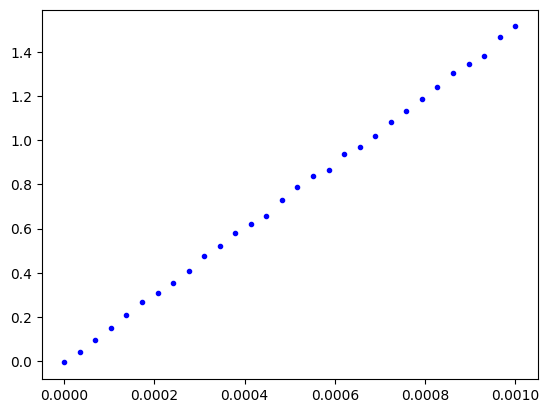

In [2]:
N = 30 # We'll use 30 data points for the generated data
R = 1500 # let's pick 1500 ohms for our "unknown" resistance
I = np.linspace(0,0.001,30) # generate N currents between 0 and 1 mA
V = I*R + np.random.normal(size=N)*.01 # add 10mV of "noise" to the data to make it more realistic

plt.plot(I,V,'b.')


## Estimating parameters from data

To estimate the parameters (in this case, the unknown resistance) we can use the `curve_fit` function from scipy. We can import `curve_fit` like so:

In [3]:
from scipy.optimize import curve_fit

In [5]:
# Let's look at the docs for curve_fit:
curve_fit?

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=None,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    nan_policy=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, and each element should be float
    convertible if it is an array like object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None

In [11]:
def fit_func(I, R):
    return I*R

popt, pcov = curve_fit(fit_func, I, V, sigma=[.01]*N)
R_fit = popt[0]
dR = np.sqrt(np.diag(pcov))[0]
print(f"R_fit = {R_fit:.1f} +/- {dR:0.1f} ohms")

R_fit = 1500.6 +/- 3.1 ohms


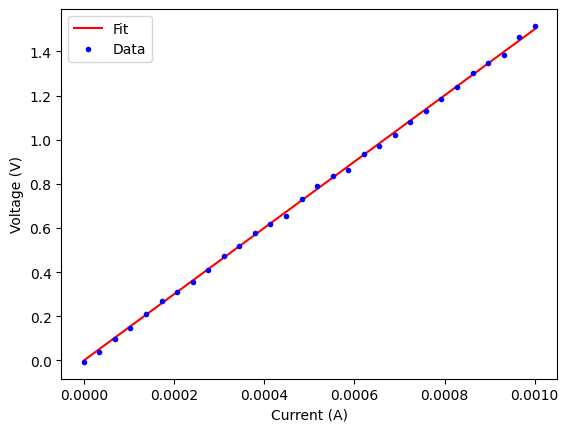

In [7]:
Vth = R_fit*I
plt.plot(I,Vth,'r-',label='Fit')
plt.plot(I,V,'b.',label='Data')
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.legend()


So this gives us some confidence that we can extract a reasonable resitance value from data collected in the experiment.